# Downloading data from landsat with Python 

### Setting up API

In [139]:
from landsatxplore.api import API

# Your USGS  credentials
username = "XXXXXXXXXXXX"
password = "XXXXXXXXXXXX"

# Initialize a new API instance
api = API(username, password)

# Perform a request
response = api.request(endpoint="dataset-catalogs")
print(response)

{'EE': 'EarthExplorer', 'GV': 'GloVis', 'HDDS': 'HDDS Explorer'}


### Searching for scenes

In [140]:
# Search for Landsat TM scenes
scenes = api.search(
    dataset='landsat_ot_c2_l2',
    latitude=53.36305556,
    longitude=-6.15583333,
    start_date='2020-01-01',
    end_date='2022-12-31',
    max_cloud_cover=50
)

# log out
api.logout()

In [142]:
import pandas as pd

# Create a DataFrame from the scenes
df_scenes = pd.DataFrame(scenes)
df_scenes = df_scenes[['display_id','wrs_path', 'wrs_row','satellite','cloud_cover','acquisition_date']]
df_scenes.sort_values('acquisition_date', ascending=False, inplace=True)

# Print the first 5 scenes
print(len(df_scenes)) #value: 55
df_scenes.head()

54


,display_id,wrs_path,wrs_row,satellite,cloud_cover,acquisition_date
0,LC08_L2SP_206023_20221118_20221128_02_T1,206,23,8,5,2022-11-18
1,LC09_L2SP_205023_20221103_20230323_02_T1,205,23,9,34,2022-11-03
2,LC08_L2SP_205023_20221026_20221107_02_T1,205,23,8,24,2022-10-26
3,LC09_L2SP_205023_20221018_20230325_02_T1,205,23,9,15,2022-10-18
4,LC08_L2SP_206023_20221017_20221031_02_T1,206,23,8,27,2022-10-17


### Downloading data

In [136]:
from landsatxplore.earthexplorer import EarthExplorer
import os

# Initialize the API
ee = EarthExplorer(username, password)

# Select the first scene
ID = 'LC08_L2SP_206023_20221118_20221128_02_T1'

# Download the scene 
try: 
    ee.download(ID, output_dir='./data')
    print('{} succesful'.format(ID))
    
# Additional error handling
except:
    if os.path.isfile('./data/{}.tar'.format(ID)):
        print('{} error but file exists'.format(ID))
    else:
        print('{} error'.format(ID))

ee.logout()

Download failed with dataset id 1 of 3. Re-trying with the next one.


825MB [01:51, 7.77MB/s]                             


None of the archived ids succeeded! Update necessary!
LC08_L2SP_206023_20221118_20221128_02_T1 error but file exists


### Working with the data in Python

In [144]:
import tarfile

# Extract files from tar archive
tar = tarfile.open('./data/{}.tar'.format(ID))
tar.extractall('./data/{}'.format(ID))
tar.close()

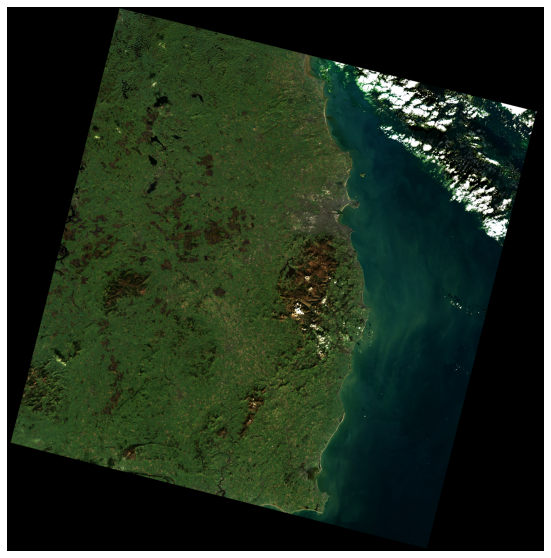

In [149]:
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt

# Load Blue (B2), Green (B3) and Red (B4) bands
B2 = tiff.imread('./data/{}/{}_SR_B2.TIF'.format(ID, ID))
B3 = tiff.imread('./data/{}/{}_SR_B3.TIF'.format(ID, ID))
B4 = tiff.imread('./data/{}/{}_SR_B4.TIF'.format(ID, ID))

# Stack and scale bands
RGB = np.dstack((B4, B3, B2))
RGB = np.clip(RGB*0.0000275-0.2, 0, 1)

# Clip to enhance contrast
RGB = np.clip(RGB,0,0.2)/0.2

# Display RGB image
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(RGB)
ax.set_axis_off()
